<a href="https://colab.research.google.com/github/YenOjeda/Riesgo-Relativo/blob/main/Proyecto_Riesgo_Relativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()
# Especifica el ID del proyecto
project_id = 'riesgo-relativo406716'
client = bigquery.Client(project=project_id)
# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo406716.pruebas.TablaGeneral`'
# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()
# Imprime el DataFrame
print(df.head())

   user_id  age sex  number_dependents_limpio  default_flag  \
0        1   55   F                         0             0   
1        2   44   M                         0             0   
2        3   54   M                         0             0   
3        4   54   F                         0             0   
4        5   42   M                         2             0   

   debt_ratio_limpio  last_month_salary_limpio  loan_real_state  loan_other  \
0           0.153112                    2200.0                0           3   
1           0.148800                    7499.0                1          19   
2           0.351635                    5900.0                1          14   
3           0.065959                    2167.0                0           3   
4           0.352151                   10415.0                2           6   

   total_loans  ...           riesgo_delayed_payment  cuartil_more_90_days  \
0            3  ...  menor riesgo de ser mal pagador                

# Nueva sección

In [ ]:
df.describe()

,user_id,age,number_dependents_limpio,default_flag,debt_ratio_limpio,last_month_salary_limpio,loan_real_state,loan_other,total_loans,more_90_days_overdue,...,cuartil_debt_ratio,dummy_debt_ratio,cuartil_delayed_payment,dummy_delayed_payment,cuartil_more_90_days,dummy_more_90_days,cuartil_secured_lines,dummy_secured_lines,cuartil_total_loans,dummy_total_loans
count,35755.0,35755.0,35755.0,35755.0,35755.000000,35755.000000,35755.0,35755.0,35755.0,35755.0,...,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0
mean,18004.10681,52.248497,0.742246,0.017676,0.467931,6349.047518,1.021535,7.490673,8.512208,0.08975,...,2.499958,0.499986,2.499958,0.499958,2.499958,0.749937,2.499958,0.499958,2.499958,0.500014
std,10394.598969,14.540253,1.112517,0.131772,0.354664,8253.267882,1.119146,4.796816,5.175203,0.50007,...,1.118037,0.500007,1.118037,0.866013,1.118037,1.29902,1.118037,0.866013,1.118037,0.500007
min,1.0,21.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25%,9004.5,41.0,0.0,0.0,0.178187,3910.500000,0.0,4.0,5.0,0.0,...,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0
50%,18005.0,52.0,0.0,0.0,0.366782,5200.000000,1.0,7.0,8.0,0.0,...,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0
75%,27009.5,63.0,1.0,0.0,0.870415,7451.000000,2.0,10.0,11.0,0.0,...,3.0,1.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,1.0
max,36000.0,89.0,13.0,1.0,1.000000,730483.000000,25.0,56.0,57.0,15.0,...,4.0,1.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35755 entries, 0 to 35754
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   user_id                                         35755 non-null  Int64  
 1   age                                             35755 non-null  Int64  
 2   sex                                             35755 non-null  object 
 3   number_dependents_limpio                        35755 non-null  Int64  
 4   default_flag                                    35755 non-null  Int64  
 5   debt_ratio_limpio                               35755 non-null  float64
 6   last_month_salary_limpio                        35755 non-null  float64
 7   loan_real_state                                 35755 non-null  Int64  
 8   loan_other                                      35755 non-null  Int64  
 9   total_loans                            

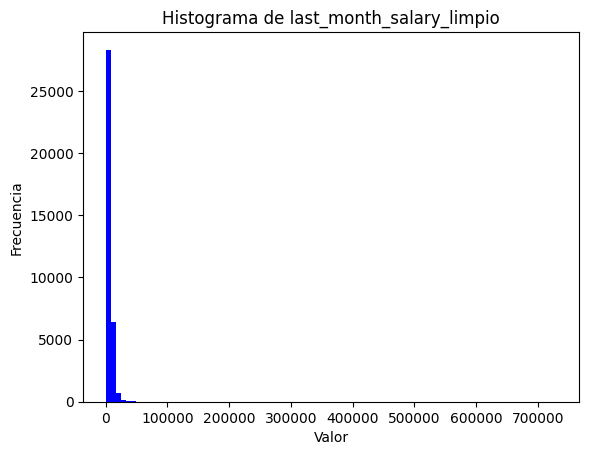

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT last_month_salary_limpio,
FROM `riesgo-relativo406716.pruebas.TablaGeneral`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['last_month_salary_limpio'], bins=90, color='blue', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de last_month_salary_limpio')
# Visualización del histograma
plt.show()





In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "riesgo-relativo406716"
query = "SELECT * FROM `riesgo-relativo406716.pruebas.TablaGeneral`"  # Reemplaza con tu propia consulta SQL
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'last_month_salary_limpio'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.27466005086898804
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


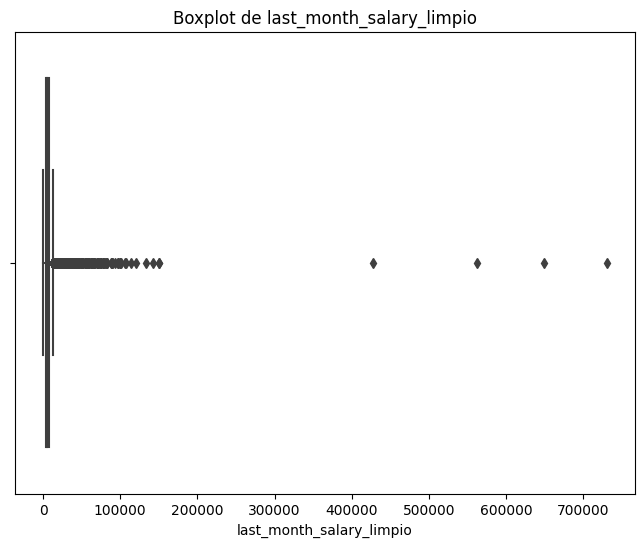

Resumen de la interpretación:
  - El boxplot muestra la dispersión y tendencia central de last_month_salary_limpio.
  - Los outliers están identificados como aquellos fuera de los límites: [-1400.25, 12761.75].
  - Se encontraron 2150 outliers en last_month_salary_limpio.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df con la variable last_month_salary
# Si la columna tiene valores nulos, puedes usar dropna() para eliminarlos
columna_last_month_salary = df['last_month_salary_limpio'].dropna()

# Crear un boxplot con seaborn
plt.figure(figsize=(8, 6))  # Opcional: ajustar el tamaño de la figura
sns.boxplot(x=columna_last_month_salary)

# Agregar etiquetas y título
plt.xlabel("last_month_salary_limpio")
plt.title("Boxplot de last_month_salary_limpio")

# Identificación de outliers
Q1 = columna_last_month_salary.quantile(0.25)
Q3 = columna_last_month_salary.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = columna_last_month_salary[(columna_last_month_salary < limite_inferior) | (columna_last_month_salary > limite_superior)]

# Mostrar el boxplot
plt.show()

# Interpretación
print("Resumen de la interpretación:")
print(f"  - El boxplot muestra la dispersión y tendencia central de last_month_salary_limpio.")
print(f"  - Los outliers están identificados como aquellos fuera de los límites: [{limite_inferior}, {limite_superior}].")
print(f"  - Se encontraron {len(outliers)} outliers en last_month_salary_limpio.")


In [ ]:
# Supongamos que ya tienes tu DataFrame df con la variable last_month_salary
# Si la columna tiene valores nulos, puedes usar dropna() para eliminarlos
columna_last_month_salary = df['last_month_salary_limpio'].dropna()

# Identificación de outliers
Q1 = columna_last_month_salary.quantile(0.25)
Q3 = columna_last_month_salary.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
columna_last_month_salary_sin_outliers = columna_last_month_salary[
    (columna_last_month_salary >= limite_inferior) & (columna_last_month_salary <= limite_superior)
]

# Calcular la media sin outliers
media_sin_outliers = columna_last_month_salary_sin_outliers.mean()

print(f"Media de last_month_salary_limpio sin outliers: {media_sin_outliers}")


Media de last_month_salary_limpio sin outliers: 5413.743282249665


In [ ]:
# Supongamos que ya tienes tu DataFrame df con la variable last_month_salary
# Si la columna tiene valores nulos, puedes usar dropna() para eliminarlos
columna_last_month_salary = df['last_month_salary_limpio'].dropna()

# Identificación de outliers
Q1 = columna_last_month_salary.quantile(0.25)
Q3 = columna_last_month_salary.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
columna_last_month_salary_sin_outliers = columna_last_month_salary[
    (columna_last_month_salary >= limite_inferior) & (columna_last_month_salary <= limite_superior)
]

# Calcular la mediana sin outliers
mediana_sin_outliers = columna_last_month_salary_sin_outliers.median()

print(f"Mediana de last_month_salary sin outliers: {mediana_sin_outliers}")


Mediana de last_month_salary sin outliers: 5200.0


In [ ]:
from google.colab import auth
import pandas as pd
from google.cloud import bigquery

# Autenticación con BigQuery
auth.authenticate_user()
project_id = "riesgo-relativo406716"  # Reemplaza con tu ID de proyecto

# Configuración de la conexión a BigQuery
client = bigquery.Client(project=project_id)

# Consulta a BigQuery para obtener la tabla
query = """
SELECT *
FROM `riesgo-relativo406716.pruebas.TablaGeneral`
"""

tabla_general = client.query(query).to_dataframe()

# Resto del código utilizando la variable 'tabla_general'


In [ ]:
import seaborn as sns


<ipython-input-41-3f6de355f593>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tabla_general.corr()


<bound method _AxesBase.tick_params of <Axes: >>

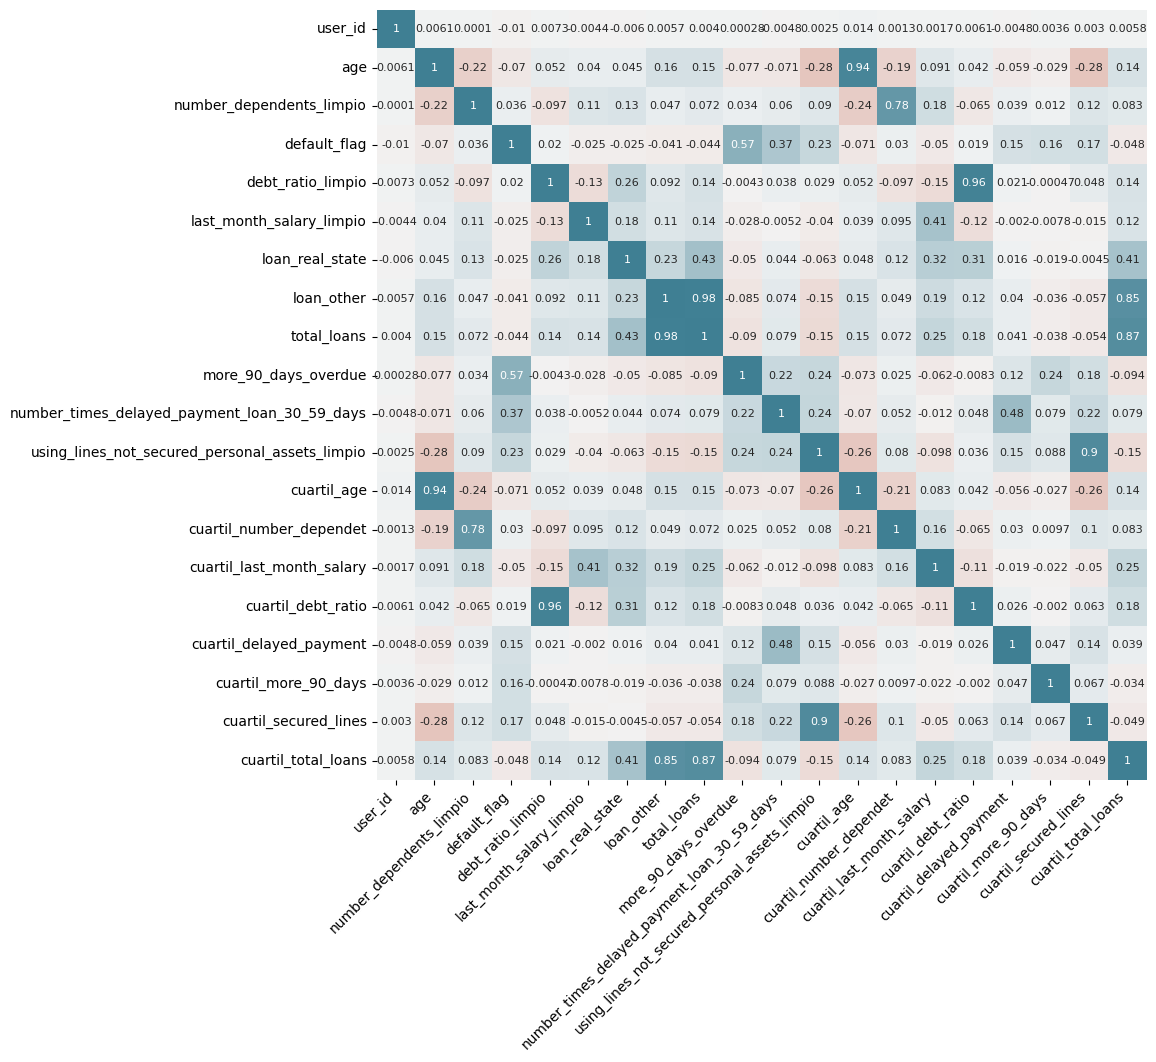

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Asegúrate de importar Seaborn
from google.colab import auth
from google.cloud import bigquery

# Autenticación con BigQuery
auth.authenticate_user()
project_id = "riesgo-relativo406716"  # Reemplaza con tu ID de proyecto

# Configuración de la conexión a BigQuery
client = bigquery.Client(project=project_id)

# Consulta a BigQuery para obtener la tabla
query = """
SELECT *
FROM `riesgo-relativo406716.pruebas.TablaGeneral`
"""

TablaGeneral = client.query(query).to_dataframe()

# Calcula la matriz de correlación
corr_matrix = tabla_general.corr()

# Visualización con Seaborn
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11, 11))
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)
ax.tick_params


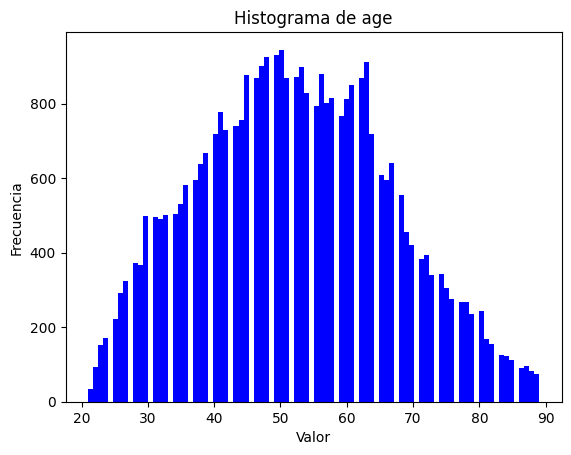

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT age,
FROM `riesgo-relativo406716.pruebas.TablaGeneral`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['age'], bins=90, color='blue', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de age')
# Visualización del histograma
plt.show()



Estadístico de Shapiro: 0.9900801777839661
P-valor: 9.598894480624997e-43
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
pip install pandas-gbq


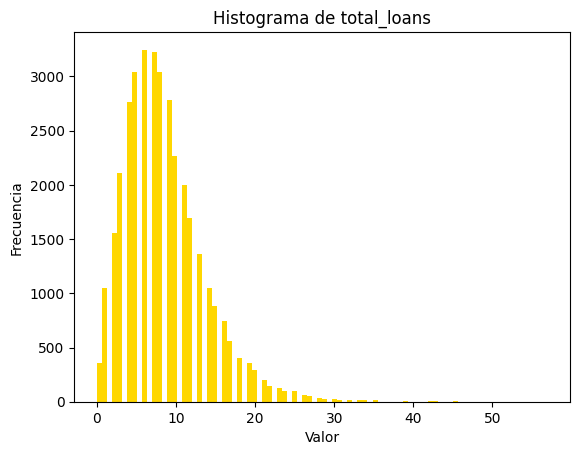

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT total_loans,
FROM `riesgo-relativo406716.pruebas.TablaGeneral`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['total_loans'], bins=90, color='gold', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de total_loans')
# Visualización del histograma
plt.show()



In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "riesgo-relativo406716"
query = "SELECT * FROM `riesgo-relativo406716.pruebas.TablaGeneral`"  # Reemplaza con tu propia consulta SQL
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'total_loans'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.9247156381607056
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


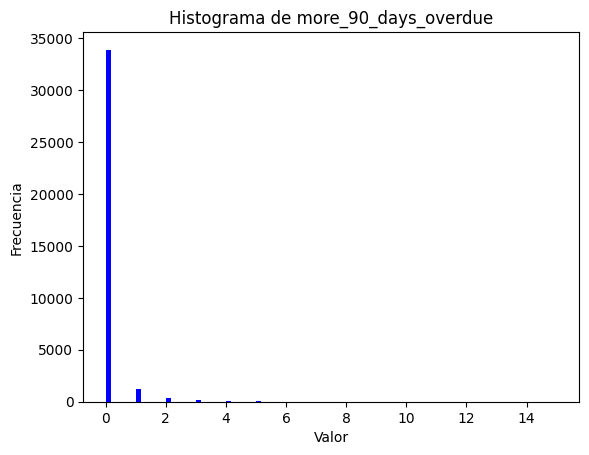

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT more_90_days_overdue,
FROM `riesgo-relativo406716.pruebas.TablaGeneral`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['more_90_days_overdue'], bins=90, color='blue', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de more_90_days_overdue')
# Visualización del histograma
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "riesgo-relativo406716"
query = "SELECT * FROM `riesgo-relativo406716.pruebas.TablaGeneral`"  # Reemplaza con tu propia consulta SQL
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'more_90_days_overdue'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.17375928163528442
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()
# Especifica el ID del proyecto
project_id = 'riesgo-relativo406716'
client = bigquery.Client(project=project_id)
# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo406716.pruebas.TablaGeneral_score`'
# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()
# Imprime el DataFrame
print(df.head())

   user_id  age  cuartil_age                 riesgo_age  dummy_age sex  \
0     8870   21            1  riesgo de ser mal pagador          1   F   
1    18876   21            1  riesgo de ser mal pagador          1   F   
2    28075   21            1  riesgo de ser mal pagador          1   M   
3    28122   21            1  riesgo de ser mal pagador          1   M   
4    33474   21            1  riesgo de ser mal pagador          1   M   

   default_flag  last_month_salary_limpio  cuartil_last_month_salary  \
0             0                    5200.0                          2   
1             0                    5200.0                          2   
2             0                    5200.0                          2   
3             0                    5200.0                          3   
4             0                    5200.0                          2   

          riesgo_last_month_salary  ...       riesgo_secured_lines  \
0        riesgo de ser mal pagador  ...  riesgo de s

In [ ]:
df.describe()

,user_id,age,cuartil_age,dummy_age,default_flag,last_month_salary_limpio,cuartil_last_month_salary,dummy_last_month_salary,number_dependents_limpio,cuartil_number_dependet,...,using_lines_not_secured_personal_assets_limpio,cuartil_secured_lines,dummy_secured_lines,total_loans,cuartil_total_loans,dummy_total_loans,loan_other,loan_real_state,score,dummy_score
count,35755.0,35755.0,35755.0,35755.0,35755.0,35755.000000,35755.0,35755.0,35755.0,35755.0,...,35755.000000,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0
mean,18004.10681,52.248497,2.499958,0.500014,0.017676,6349.047518,2.499958,0.500014,0.742246,2.499958,...,0.315480,2.499958,0.249979,8.512208,2.499958,0.500014,7.490673,1.021535,3.249951,0.211383
std,10394.598969,14.540253,1.118037,0.500007,0.131772,8253.267882,1.118037,0.500007,1.112517,1.118037,...,0.346474,1.118037,0.433007,5.175203,1.118037,0.500007,4.796816,1.119146,1.556197,0.408295
min,1.0,21.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,...,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,9004.5,41.0,1.5,0.0,0.0,3910.500000,1.5,0.0,0.0,1.5,...,0.030072,1.5,0.0,5.0,1.5,0.0,4.0,0.0,2.0,0.0
50%,18005.0,52.0,2.0,1.0,0.0,5200.000000,2.0,1.0,0.0,2.0,...,0.150628,2.0,0.0,8.0,2.0,1.0,7.0,1.0,3.0,0.0
75%,27009.5,63.0,3.0,1.0,0.0,7451.000000,3.0,1.0,1.0,3.0,...,0.547680,3.0,0.0,11.0,3.0,1.0,10.0,2.0,4.0,0.0
max,36000.0,89.0,4.0,1.0,1.0,730483.000000,4.0,1.0,13.0,4.0,...,1.000000,4.0,1.0,57.0,4.0,1.0,56.0,25.0,8.0,1.0


          Predicted 0  Predicted 1
Actual 0        28118         7005
Actual 1           77          555


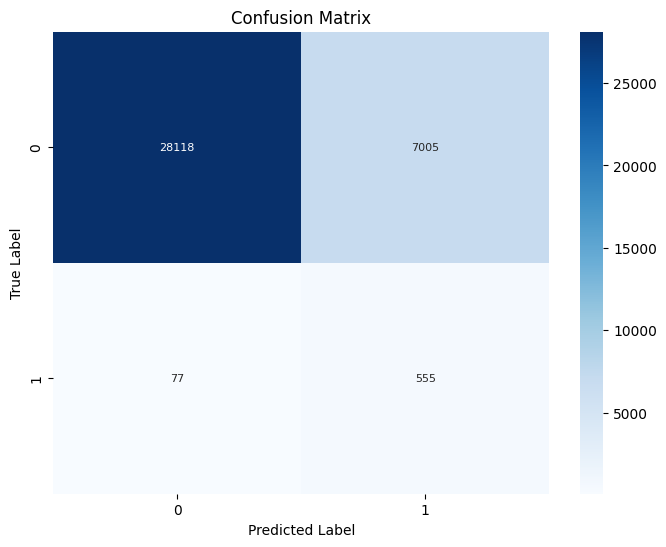

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Conectar a la base de datos desde Google Colab
project_id = "riesgo-relativo406716"
query = "SELECT * FROM pruebas.score"
df = pd.read_gbq(query, project_id=project_id)
# Supongamos que 'default_flag' es tu etiqueta real
y_real = df['default_flag']
# Supongamos que 'dummy_score' es tu etiqueta predicha
y_pred = df[['dummy_score']]
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred.any(axis=1))
# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)
# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
pip install scikit-learn

Accuracy: 0.9685358691092155
Confusion Matrix:
[[6796  223]
 [   2  130]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      7019
         1.0       0.37      0.98      0.54       132

    accuracy                           0.97      7151
   macro avg       0.68      0.98      0.76      7151
weighted avg       0.99      0.97      0.98      7151

          Predicted 0  Predicted 1
Actual 0         6796          223
Actual 1            2          130


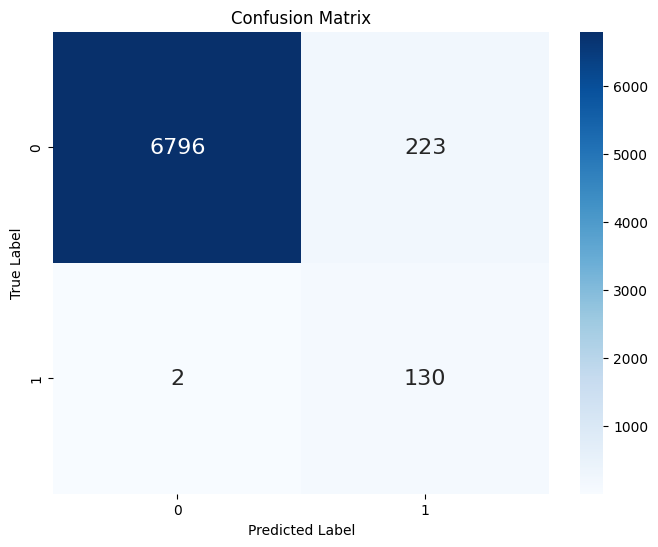

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.cloud import bigquery
# Especifica tu proyecto y la tabla de BigQuery
project_id = 'riesgo-relativo406716'
table_id = 'pruebas.TablaGeneral_score'
# Consulta BigQuery y carga los datos en un DataFrame de Pandas
client = bigquery.Client(project=project_id)
query = f'SELECT age, debt_ratio_limpio, total_loans, more_90_days_overdue, number_times_delayed_payment_loan_30_59_days, using_lines_not_secured_personal_assets_limpio, number_dependents_limpio, last_month_salary_limpio, default_flag FROM `{project_id}.{table_id}`'
df = client.query(query).to_dataframe()
# Separar las características (X) y la variable dependiente (y)
X = df[['age', 'debt_ratio_limpio', 'total_loans', 'more_90_days_overdue', 'number_times_delayed_payment_loan_30_59_days', 'using_lines_not_secured_personal_assets_limpio', 'number_dependents_limpio', 'last_month_salary_limpio']]
y = df['default_flag']
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Crear el modelo de regresión logística con peso de clase
model = LogisticRegression(class_weight='balanced')
# Entrenar el modelo
model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)
# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()
# Especifica el ID del proyecto
project_id = 'riesgo-relativo406716'
client = bigquery.Client(project=project_id)
# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo406716.pruebas.TablaGeneral_score`'
# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()
# Imprime el DataFrame
print(df.head())

   user_id  age  cuartil_age                       riesgo_age  dummy_age sex  \
0        1   55            3  menor riesgo de ser mal pagador          0   F   
1        2   44            2        riesgo de ser mal pagador          1   M   
2        3   54            3  menor riesgo de ser mal pagador          0   M   
3        4   54            3  menor riesgo de ser mal pagador          0   F   
4        5   42            2        riesgo de ser mal pagador          1   M   

   default_flag  last_month_salary_limpio  cuartil_last_month_salary  \
0             0                    2200.0                          1   
1             0                    7499.0                          4   
2             0                    5900.0                          3   
3             0                    2167.0                          1   
4             0                   10415.0                          4   

          riesgo_last_month_salary  ...             riesgo_secured_lines  \
0        r

In [ ]:
df.describe()

,user_id,age,number_dependents_limpio,default_flag,debt_ratio_limpio,last_month_salary_limpio,loan_real_state,loan_other,total_loans,more_90_days_overdue,...,cuartil_debt_ratio,dummy_debt_ratio,cuartil_delayed_payment,dummy_delayed_payment,cuartil_more_90_days,dummy_more_90_days,cuartil_secured_lines,dummy_secured_lines,cuartil_total_loans,dummy_total_loans
count,35755.0,35755.0,35755.0,35755.0,35755.000000,35755.000000,35755.0,35755.0,35755.0,35755.0,...,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0
mean,18004.10681,52.248497,0.742246,0.017676,0.467931,6349.047518,1.021535,7.490673,8.512208,0.08975,...,2.499958,0.499986,2.499958,0.249979,2.499958,0.249979,2.499958,0.249979,2.499958,0.500014
std,10394.598969,14.540253,1.112517,0.131772,0.354664,8253.267882,1.119146,4.796816,5.175203,0.50007,...,1.118037,0.500007,1.118037,0.433007,1.118037,0.433007,1.118037,0.433007,1.118037,0.500007
min,1.0,21.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25%,9004.5,41.0,0.0,0.0,0.178187,3910.500000,0.0,4.0,5.0,0.0,...,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0
50%,18005.0,52.0,0.0,0.0,0.366782,5200.000000,1.0,7.0,8.0,0.0,...,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0
75%,27009.5,63.0,1.0,0.0,0.870415,7451.000000,2.0,10.0,11.0,0.0,...,3.0,1.0,3.0,0.0,3.0,0.0,3.0,0.0,3.0,1.0
max,36000.0,89.0,13.0,1.0,1.000000,730483.000000,25.0,56.0,57.0,15.0,...,4.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0


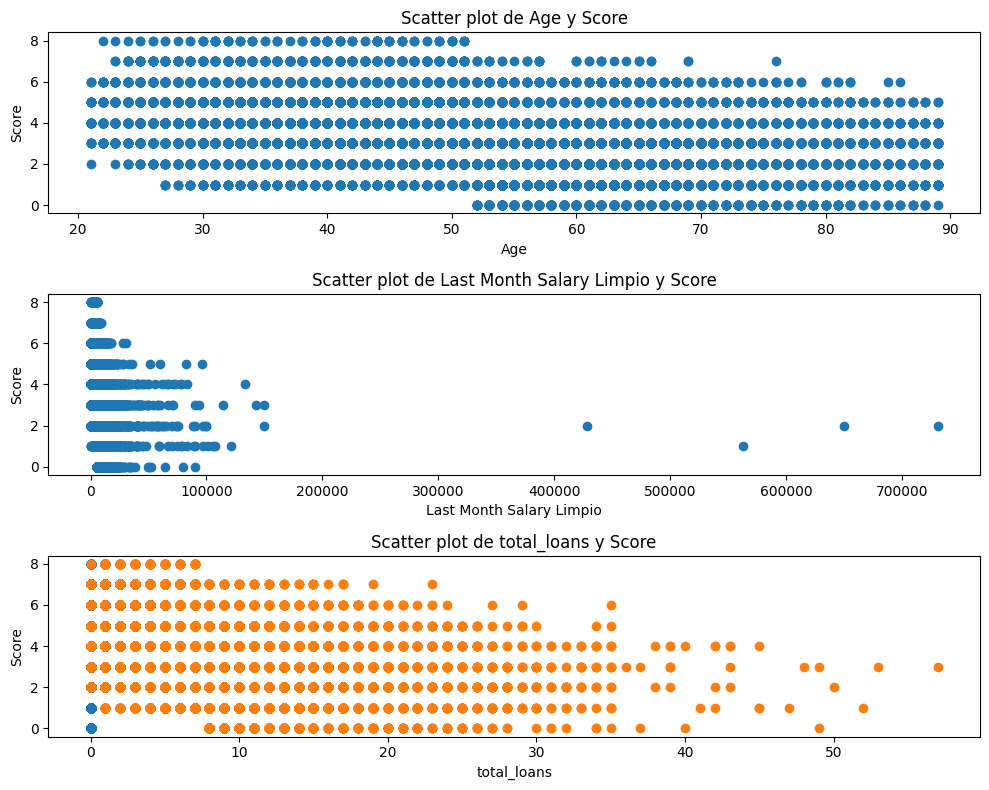

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
# Autenticación con Google Cloud
auth.authenticate_user()
# Configurar el cliente de BigQuery
project_id = 'riesgo-relativo406716'
client = bigquery.Client(project=project_id)
# Consulta SQL para obtener los datos necesarios
query = '''
SELECT
  age,
  last_month_salary_limpio,
  more_90_days_overdue,
  total_loans,
  score
FROM
  `riesgo-relativo406716.pruebas.TablaGeneral_score`
'''
# Ejecutar la consulta y obtener los resultados
df = client.query(query).to_dataframe()
# Graficar el gráfico bivariado
plt.figure(figsize=(10, 8))
# Scatter plot de age y score
plt.subplot(3, 1, 1)
plt.scatter(df['age'], df['score'])
plt.title('Scatter plot de Age y Score')
plt.xlabel('Age')
plt.ylabel('Score')
# Scatter plot de last_month_salary_limpio y score
plt.subplot(3, 1, 2)
plt.scatter(df['last_month_salary_limpio'], df['score'])
plt.title('Scatter plot de Last Month Salary Limpio y Score')
plt.xlabel('Last Month Salary Limpio')
plt.ylabel('Score')
# Scatter plot de number_dependents_limpio y score
plt.subplot(3, 1, 3)
plt.scatter(df['more_90_days_overdue'], df['score'])
plt.title('Scatter plot de more_90_days_overdue y Score')
plt.xlabel('more_90_days_overdue')
plt.ylabel('Score')
# Scatter plot de number_dependents_limpio y score
plt.subplot(3, 1, 3)
plt.scatter(df['total_loans'], df['score'])
plt.title('Scatter plot de total_loans y Score')
plt.xlabel('total_loans')
plt.ylabel('Score')
plt.tight_layout()
plt.show()



Accuracy: 0.9685358691092155
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      7019
         1.0       0.37      0.98      0.54       132

    accuracy                           0.97      7151
   macro avg       0.68      0.98      0.76      7151
weighted avg       0.99      0.97      0.98      7151

          Predicted 0  Predicted 1
Actual 0         6796          223
Actual 1            2          130


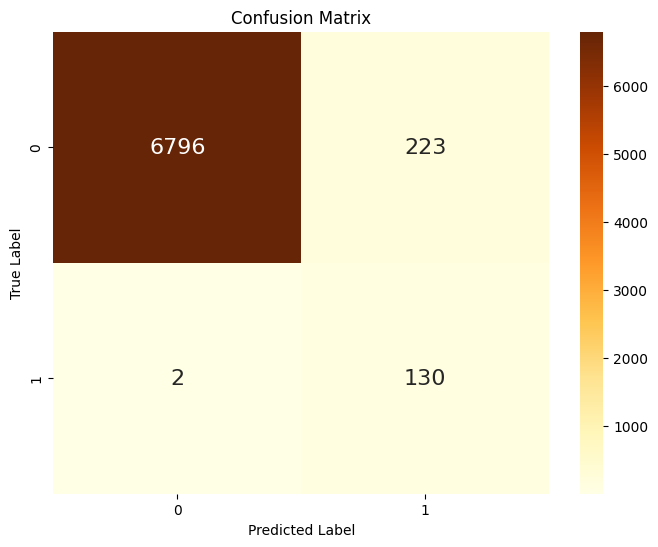

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Supongamos que 'default_flag' es tu etiqueta real
y_real = y_test  # Utilizamos y_test del conjunto de prueba
# Supongamos que 'y_pred' es tu etiqueta predicha
# Usamos y_pred obtenido de tu modelo LogisticRegression
y_pred = model.predict(X_test)
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)
# Calcular métricas
accuracy = accuracy_score(y_real, y_pred)
classification_rep = classification_report(y_real, y_pred)
# Mostrar métricas
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')
# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)
# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()